In [1]:
import numpy as np
from scipy import optimize
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.linear_model import LinearRegression
import pandas as pd
import helpers
import scipy
import itertools

### Ex. 1

$$\mathcal{L}[\mathcal{P}(G)] = - \sum_{G\in M_N } \mathcal{P}(G)ln\mathcal{P}(G) + \lambda\mathcal{f}(\mathcal{P}(G)) = - \sum_{G\in M_N } \mathcal{P}(G)ln\mathcal{P}(G) + \lambda_1 \bigl(\sum_{G\in M_N } \mathcal{P}(G) -1 \bigl) -\lambda_2\bigl(\sum_{G\in M_N } \mathcal{P}(G)m(G) - m\bigl) = $$

$$\frac{\partial\mathcal{ L}[\mathcal{P}(G)]}{\mathcal{P}(G)} = ln\mathcal{P}(G) -1 + \lambda_1 + \lambda_2m(G)=0$$

$$ln\mathcal{P}(G) = \lambda_1 -1 + \lambda_2m(G)$$

$$\mathcal{P}(G) = e^{\lambda_1 - 1}e^{-\lambda_2m(G)} = \frac{e^{-\lambda_2m(G)}}{Z}$$

$$m(G) = \langle k_G  \rangle = \frac{2E}{N} $$

$$Z = \sum_{G \in M_n} e^{-\lambda \langle k_G  \rangle } = \sum_{G \in M_n} e^{-\lambda \frac{2E}{N}} = \sum_{E=0}^{\frac{N(N-1)}{2}} N_G(E)e^{-\lambda \frac{2E}{N}} = \sum_{E=0}^{\frac{N(N-1)}{2}} {\frac{N(N-1)}{2}\choose E}q^E = $$

$$=(q+1)^{\frac{N(N-1)}{2}}=(e^{-2\frac{\lambda}{N}}+1)^{\frac{N(N-1)}{2}}$$

### Ex. 2, 3

In [2]:
n, p = 1000, 0.2
def return_ER_graph(n, p):
    am = np.random.choice([1, 0], p=[p, 1-p], size=(n, n))
    am = np.triu(am, k=1)
    return nx.from_numpy_matrix(am)
er_graph = return_ER_graph(n, p)
#nx.draw(er_graph)

### Ex. 4

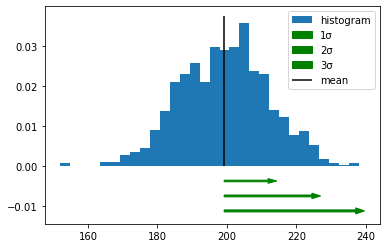

In [3]:
degrees = np.array(list(dict(er_graph.degree).values()))
helpers.draw_hist(degrees)

### Ex. 5
We expect Binomial/Poisson distribution

### Ex. 6
TO DO:

### Ex. 7 

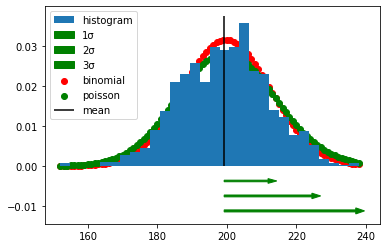

In [4]:
fig, ax = plt.subplots()
x = np.arange(degrees.min(), degrees.max()+1)
y_binomial = np.array([scipy.stats.binom.pmf(k, n, p) for k in x])
y_poisson = np.array([scipy.stats.poisson.pmf(k, n*p) for k in x])
ax.scatter(x, y_binomial, color='red', label='binomial')
ax.scatter(x, y_poisson, color='green', label='poisson')
helpers.draw_hist(degrees, ax=ax)

In [5]:
degree_counter = Counter(degrees)
y = np.array([degree_counter[k] for k in np.arange(degrees.min(), degrees.max()+1)])

In [6]:
scipy.stats.chisquare(y, y_binomial).statistic, scipy.stats.chisquare(y, y_poisson).statistic

(1174642.226351766, 1108453.5917943662)

### Ex. 8

In [7]:
Ns = [100, 1000, 10000]
ps = [0.1, 0.5, 0.9]
b_stats = {} 
p_stats = {}
for n in Ns: 
    print(n)
    for p in ps: 
        er_graph = return_ER_graph(n, p)
        degrees = np.array(list(dict(er_graph.degree).values()))
        x = np.arange(degrees.min(), degrees.max()+1)
        y_binomial = np.array([scipy.stats.binom.pmf(k, n, p) for k in x])
        y_poisson = np.array([scipy.stats.poisson.pmf(k, n*p) for k in x])
        degree_counter = Counter(degrees)
        y = np.array([degree_counter[k] for k in np.arange(degrees.min(), degrees.max()+1)])
        binomial_stat = scipy.stats.chisquare(y, y_binomial).statistic
        poisson_stat = scipy.stats.chisquare(y, y_poisson).statistic
        b_stats[(n, p)] = binomial_stat
        p_stats[(n, p)] = poisson_stat

100
1000
10000


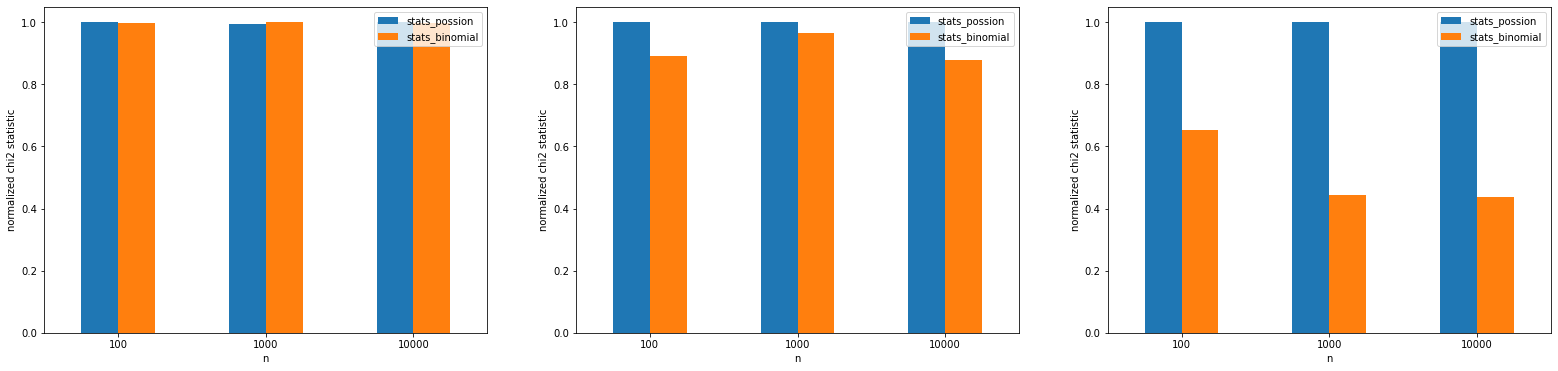

In [8]:
fig, axs = plt.subplots(ncols=3, figsize=(27, 6))
for i, p in enumerate(ps): 
    binomial_stat_tmp = [(n, stat) for (n, p_), stat in b_stats.items() if p_ == p]
    poisson_stat_tmp = [(n, stat) for (n, p_), stat in p_stats.items() if p_ == p]
    
    binomial_stat_tmp = pd.DataFrame(binomial_stat_tmp, columns=['n', 'stats'])
    poisson_stat_tmp = pd.DataFrame(poisson_stat_tmp, columns=['n', 'stats'])
    stat = poisson_stat_tmp.merge(binomial_stat_tmp, on=['n'], suffixes=('_possion', '_binomial')).set_index('n')
    stat[['stats_possion', 'stats_binomial']] = stat[['stats_possion', 'stats_binomial']].apply(lambda x: x/max(x), axis=1)
    stat.plot.bar(rot=0, ax=axs[i])
    axs[i].set_ylabel('normalized chi2 statistic')

### P5.1

$$ E(K) = \sum_{k=0}^{\infty} \frac{ke^{-\langle k \rangle } \langle k \rangle ^k}{k!} = \sum_{k=1}^{\infty} \frac{ke^{-\langle k \rangle } \langle k \rangle ^k}{k!} = \sum_{k=1}^{\infty} \frac{e^{-\langle k \rangle } \langle k \rangle ^k}{(k-1)!} = \langle k \rangle e^{-\langle k \rangle } \sum_{k=1}^{\infty} \frac{ \langle k \rangle ^{k-1}}{(k-1)!} = $$


$$ |k'=k-1|= \langle k \rangle e^{-\langle k \rangle } \sum_{k=0}^{\infty} \frac{ \langle k \rangle ^{k}}{k!} = \Big| e^x = \sum_{k=0}^{\infty} \frac{x^k}{k!} \Big| = \langle k \rangle e^{-\langle k \rangle } e^{\langle k \rangle } = \langle k \rangle$$


$$ E(K^2) = \sum_{k=0}^{\infty} \frac{k^2e^{-\langle k \rangle } \langle k \rangle ^k}{k!} = \sum_{k=1}^{\infty} \frac{k^2e^{-\langle k \rangle } \langle k \rangle ^k}{k!} = \sum_{k=1}^{\infty} \frac{ke^{-\langle k \rangle } \langle k \rangle ^k}{(k-1)!} = \langle k \rangle e^{-\langle k \rangle } \sum_{k=1}^{\infty} \frac{ k\langle k \rangle ^{k-1}}{(k-1)!} =$$


$$|k'=k-1|= \langle k \rangle e^{-\langle k \rangle } \sum_{k=0}^{\infty} (k+1)\frac{ \langle k \rangle ^{k}}{k!} =
\langle k \rangle e^{-\langle k \rangle } \sum_{k=0}^{\infty} k\frac{ \langle k \rangle ^{k}}{k!} + \langle k \rangle e^{-\langle k \rangle } \sum_{k=0}^{\infty} \frac{ \langle k \rangle ^{k}}{k!} = *$$

$$\langle k \rangle e^{-\langle k \rangle } \sum_{k=0}^{\infty} k\frac{ \langle k \rangle ^{k}}{k!} = \langle k \rangle e^{-\langle k \rangle } \sum_{k=1}^{\infty} \frac{ \langle k \rangle ^{k}}{(k-1)!}=|k'=k-1|=\langle k \rangle^2 e^{-\langle k \rangle } \sum_{k=0}^{\infty} \frac{ \langle k \rangle ^{k}}{k!} = \langle k \rangle^2$$

$$*=\langle k \rangle^2 + \langle k \rangle = E(K^2)$$

$$Var(K) = E(K^2) - [E(K)]^2 = \langle k \rangle^2 + \langle k \rangle - \langle k \rangle^2 = \langle k \rangle $$

### P5.2

In [9]:
n, p = 1000, 0.2
er_graph = return_ER_graph(n, p)
f'p={p}, and <C>={nx.average_clustering(er_graph)}'

'p=0.2, and <C>=0.19960795843497806'

### P5.3 

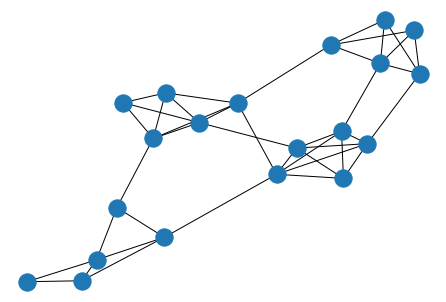

In [272]:
def return_communities(n=20, n_communities=4, p_low=0.05, p_high=0.8):
    comm_indices = np.arange(n).reshape(n_communities, -1)
    pairs = [np.array(list(itertools.product(comm_indices_, comm_indices_))) for comm_indices_ in comm_indices]
    am = np.random.choice([1, 0], p=[p_low, 1-p_low], size=(n, n))
    am_high = np.random.choice([1, 0], p=[p_high, 1-p_high], size=(n, n))

    for pairs_ in pairs: 
        am[pairs_[:, 0], pairs_[:, 1]] = am_high[pairs_[:, 0], pairs_[:, 1]]
    
    am = np.triu(am, k=1)
    return nx.from_numpy_matrix(am)
com_g = return_communities()
nx.draw(com_g, pos=nx.spring_layout(com_g))

### P5.4 

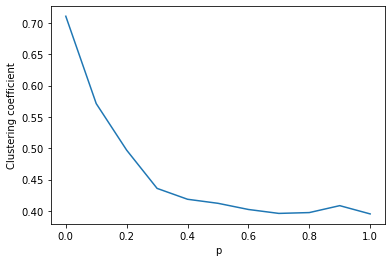

In [11]:
ps = np.linspace(0, 1, 11)
ccs = [nx.average_clustering(nx.watts_strogatz_graph(50, 20, p)) for p in ps]
plt.plot(ps, ccs)
plt.ylabel('Clustering coefficient')
plt.xlabel('p');

### P5.6

In [196]:
from numba import njit, jit, typed

In [88]:
@jit
def gen_pairs(possible_connections, am): 
    pairs = []
    for i in range(am.shape[0]):
        for j in range(am.shape[0]):
            if i > j and am[i , j] == 0 and possible_connections[i] and possible_connections[j]:
                pairs.append((i, j))
    return pairs

In [89]:
@jit
def add_pair(pair, possible_connections, am):
    possible_connections[pair[0]] -= 1
    possible_connections[pair[1]] -= 1
    am[pair] = 1
    return possible_connections, am

In [90]:
@jit
def remove_pair(pair, possible_connections, am):
    possible_connections[pair[0]] += 1
    possible_connections[pair[1]] += 1
    am[pair] = 0
    return possible_connections, am

In [191]:

def simulate(possible_connections, am, pairs_added):
    pairs = gen_pairs(possible_connections, am)
    while pairs: 
        pair_idx = np.random.randint(0, len(pairs))
        pair = pairs[pair_idx]
        add_pair(pair, possible_connections, am)
        pairs_added.append(pair)
        pairs = gen_pairs(possible_connections, am)
        #print(am.sum(), len(pairs_added))
    return possible_connections, am, pairs_added

In [192]:
@jit
def rollback(possible_connections, am, pairs_added, divide_factor): 
    for i in range(len(pairs_added)-1, len(pairs_added)//divide_factor, -1):
        possible_connections, am = remove_pair(pairs_added[i], possible_connections, am)
        pairs_added = pairs_added[:i]
    return possible_connections, am, pairs_added

In [262]:
def configuration_model(degrees, n_simulations=20, start_divide_factor=2):
    am = np.zeros((degrees.shape[0], degrees.shape[0]))
    simulations = [simulate(degrees.copy(), am.copy(), []) for _ in range(n_simulations)]
    done = False
    last_best_simulation = [0, np.array([0]), 0]
    divide_factor = start_divide_factor
    rollback_count = 0
    while not done:
        for (possible_connections, am, pairs_added) in simulations: 
            if possible_connections.sum() == 0:# and all(am.sum(axis=1) != 0):
                done = True
                break
        else: 
            best_simulation = max(simulations, key=lambda x: x[1].sum())
            #print(best_simulation[1].sum(), divide_factor)
            if last_best_simulation[1].sum() < best_simulation[1].sum(): 
                last_best_simulation = best_simulation
                divide_factor = start_divide_factor
            else: 
                divide_factor += 1
                divide_factor = min(divide_factor, 10)
            possible_connections, am, pairs_added = rollback(possible_connections, am, typed.List(pairs_added.copy()), divide_factor)
            rollback_count += 1
            assert am.sum() == len(pairs_added), f'am.sum(){am.sum()} != len(pairs_added) {len(pairs_added)}'
            #print('new_start', possible_connections[0].sum(), am[1].sum())
            simulations = [simulate(possible_connections.copy(), am.copy(), pairs_added.copy()) for _ in range(n_simulations)]
    return nx.from_numpy_matrix(am), rollback_count

In [263]:
def return_proper_degrees(n=30):
    nx_degrees = [1]
    degrees = []
    while nx_degrees != sorted(degrees):
        degrees = np.random.randint(1,n//2, size=(n, )) #np.array([2, 2, 2])
        if degrees.sum() % 2 == 1: 
            degrees[0] += 1
        nx_degrees = sorted(nx.adjacency_matrix(nx.configuration_model(degrees)).toarray().sum(axis=1).flatten())
        
    return degrees

[1 1 3 1 4 4 3 1 3 1]
True
0


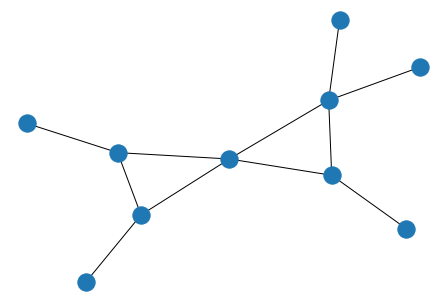

In [264]:
degrees = return_proper_degrees(n=10)
print(degrees)
g,rbc = configuration_model(degrees, n_simulations=80)
print(sorted(dict(g.degree()).values()) == sorted(degrees))
print(rbc)
nx.draw(g)

In [282]:
import tqdm
ns = [5, 10, 20, 30, 40]
counts = []
for n in ns:
    print(n)
    counts.append([])
    for _ in tqdm.tqdm(range(5)):
        degrees = return_proper_degrees(n=n)
        _, rbc = configuration_model(degrees, n_simulations=10*n) 
        counts[-1].append(rbc)

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

5
10
20


  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

30


  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

40


100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [12:17<00:00, 147.43s/it]


In [283]:
counts = np.array(counts) + 1 

Text(0.5, 0, 'n_nodes in graph')

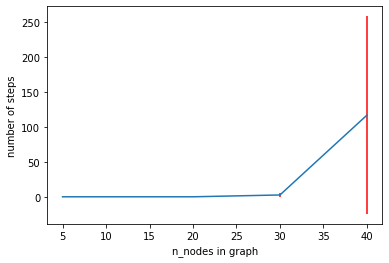

In [291]:
plt.errorbar(ns, counts.mean(axis=1), yerr=counts.std(axis=1), ecolor='red')
plt.ylabel('number of steps')
plt.xlabel('n_nodes in graph')

### P5.5

$$p = \frac{E}{\frac{N(N-1)}{2}}$$

K has binomial distribution
$$\mathcal{P}(k) = {N-1 \choose k} \biggl( \frac{E}{\frac{N(N-1)}{2}}\biggl)^k \biggl(1-  \frac{E}{\frac{N(N-1)}{2}}\biggl)^{N-1-k}$$

We can approximate it with Poisson distribution

$$\mathcal{P}(k)  \approx \frac{e^{-\langle k \rangle}\langle k \rangle^k}{k!}$$
Where: 
$$\langle k \rangle \approx Np = N\frac{E}{\frac{N(N-1)}{2}} = \frac{2E}{N-1}$$

In [334]:
def return_ER_NE_graph(n, e):
    am = np.zeros((n,n))
    pairs = []
    for i in range(n):
        for j in range(n):
            if i > j:
                pairs.append((i, j))

    indices = np.random.choice(len(pairs), size=(e,), replace=False)
    for pair in np.array(pairs)[indices]:
        am[tuple(pair)] = 1
    return nx.from_numpy_matrix(am)
N, E = 10000, 900000
E = min(N*(N-1)/2, E)
er_graph = return_ER_NE_graph(N, E)
degrees = np.array(list(dict(er_graph.degree).values()))
degrees.mean(), 2*E/(N-1)

(180.0, 180.01800180018003)

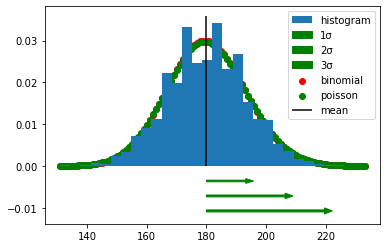

In [335]:
fig, ax = plt.subplots()
p = E/(N*(N-1)/2)
x = np.arange(degrees.min(), degrees.max()+1)
y_binomial = np.array([scipy.stats.binom.pmf(k, N, p) for k in x])
y_poisson = np.array([scipy.stats.poisson.pmf(k, N*p) for k in x])
ax.scatter(x, y_binomial, color='red', label='binomial')
ax.scatter(x, y_poisson, color='green', label='poisson')
helpers.draw_hist(degrees, ax=ax)

### P5.7

$$Z = {\frac{N(N-1)}{2}\choose E} e^{-2\frac{\lambda E}{N}}$$

$$\mathcal{P}(G) = \frac{e^{-\lambda_2m(G)}}{{\frac{N(N-1)}{2}\choose E} e^{-2\frac{\lambda_1 E}{N}}} = \frac{e^{-\lambda_2m(G) + 2\frac{\lambda_1 E}{N}}}{\frac{N(N-1)}{2}\choose E}$$